# Fandango Movie Project

### Introduction

The inspiration for this project comes from a data journalist named Walt Hickey who analyzed movie ratings in 2012 and concluded that the popular movie rating website Fandango had a deeply flawed rating system. For example, the actual rating displayed (5 stars) was always rounded upward to the nearest half star. 

Fandango responded by saying this flaw (amongst others) discovered by Hickey was the result of a "bug-in-their-system". Fandango claims to have fixed this issue, but who really trusts what big corporations have to say these days. As a result, we shall put our Data Science skills to the test to prove if Fandango is really telling the truth.

### Data Exploration

As we do with any new project, it's always a good idea to get a feel for the data set that we will be working with. Let's create our dataframe and to some preliminary examinations. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
films = pd.read_csv('fandango_score_comparison.csv')
films.head(10)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,...,3.60,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,...,3.45,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,...,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,...,3.70,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5
9,Love & Mercy (2015),89,87,80,8.5,7.8,4.5,4.0,4.45,4.35,...,3.90,4.5,4.5,4.0,4.5,4.0,54,5367,864,0.5


In [2]:
# We also wish to examine films from 2016/17 to see if Fandango is honest.
proof_films = pd.read_csv('movie_ratings_16_17.csv')
proof_films.head(10)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0
5,A Monster Calls,2016,76,7.5,87,84,4.0,3.80,3.75,4.35,4.20,4.0,4.0,4.5,4.0
6,A Street Cat Named Bob,2016,54,7.4,77,79,4.5,2.70,3.70,3.85,3.95,2.5,3.5,4.0,4.0
7,Alice Through the Looking Glass,2016,34,6.2,30,50,4.0,1.70,3.10,1.50,2.50,1.5,3.0,1.5,2.5
8,Allied,2016,60,7.1,61,66,4.0,3.00,3.55,3.05,3.30,3.0,3.5,3.0,3.5
9,Amateur Night,2016,38,5.0,0,27,3.5,1.90,2.50,0.00,1.35,2.0,2.5,0.0,1.5


While there are only 22 and 15 columns respectively, we only need to choose a few columns for our analysis. Below we define new dataframes containing columns that we deem pertinent for our purpose.

In [3]:
condensed_2015 = films[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
condensed_2016_17 = proof_films[['movie', 'year', 'fandango']]

### Sampling Explanation

After reading the repository "README" for each dataset, we can conclude that the data sets were not appropriately sampled to reflect the actual value of the populations. As a result, we need to modify the goal of our project. Instead of trying to determine if Fandango is telling the truth or not, we should examine if the rating schemes in 2015 and 2016 appear any different. This should serve as a suitable proxy for our original goal.

In [4]:
# We begin by selecting a random sample of 10 movies from either dataset
sample_15 = condensed_2015.sample(10, random_state=1)
sample_16 = condensed_2016_17.sample(10, random_state=1)

In [5]:
# Let's make sure our data frames contain samples
sample_15

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
98,Get Hard (2015),4.0,3.9,5933,0.1
66,The Gift (2015),4.0,3.7,2680,0.3
53,Hot Pursuit (2015),4.0,3.7,2618,0.3
75,San Andreas (2015),4.5,4.3,9749,0.2
121,The Stanford Prison Experiment (2015),4.0,3.9,51,0.1
74,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,0.2
119,Phoenix (2015),3.5,3.4,70,0.1
128,Mission: Impossible â€“ Rogue Nation (2015),4.5,4.4,8357,0.1
44,Kingsman: The Secret Service (2015),4.5,4.2,15205,0.3
58,Seventh Son (2015),3.5,3.2,1213,0.3


In [6]:
sample_16

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Recall that we are trying to examine if their is a visible rating difference between Fandango popular movie ratings for 2015 and 2016. This raises an important question: "What should we consider a popular movie?". Hickey's original criteria of a "popular" movie was a movie of 30 or more ratings. We should check this criteria for each dataframe to see if our samples are representative.

In [7]:
# Sum how many movies had 30 ratings or less in our 2015 sample
sum(sample_15['Fandango_votes'] < 30)

0

Our data set for 2016 does not have a column that counts the number of votes for each particular movie. However, after searching up each movie in our sample individually on Fandango, we can confirm that 90% of the movies in our sample are "popular". This bodes well for us for the rest of this project.

### Data Analysis

We are now ready to begin performing our analysis. Let's begin by ensuring that the moives all were released in the same year as our dataset claims.

In [8]:
# We first create a new column that extracts the year from the FILM column
condensed_2015['Year'] = condensed_2015['FILM'].str[-5:-1].copy()
condensed_2015['Year'].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



2015    129
2014     17
Name: Year, dtype: int64

In [9]:
# We will use Boolean indexing to select only films from 2015
mask = condensed_2015['Year'] == '2015'
condensed_2015 = condensed_2015[mask]
condensed_2015['Year'].value_counts()  # All values should be 2015

2015    129
Name: Year, dtype: int64

In [10]:
# We check the same thing for our other dataset
condensed_2016_17['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

Now that our data is cleaned, we can proceed to our analysis. Let's plot an overlapping kernel density estimation to visualize if the ratings for each dataframe changed year-over-year.

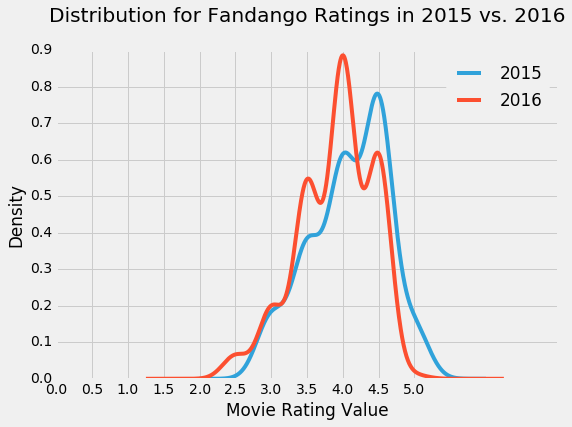

In [11]:
%matplotlib inline
style.use('fivethirtyeight')
condensed_2015['Fandango_Stars'].plot.kde(label='2015', figsize=(8, 5.5))
condensed_2016_17['fandango'].plot.kde(label='2016')
plt.title('Distribution for Fandango Ratings in 2015 vs. 2016', y=1.07)
plt.xlabel('Movie Rating Value')
plt.ylabel('Density')
plt.legend()
plt.xticks(np.arange(0, 5.1, 0.5))
plt.show()

### Initial Observations

It's pretty clear that there is a marked difference between the two distributions. Movies in 2016 were rated slightly lower than movies in 2016/17. 

However, we should ask ourselves, "Does it matter if we compare absolute frequencies, or should we try something different?". For example if we had 1000 movies in one dataset and only 20 in another, this has the potential to skew our analysis. Let's analyze the data a bit more to get an idea of how things are distributed. 

In [12]:
# Let's create a frequency distribution based upon percentages for each dataframe
print('2015')
print('=====================')
condensed_2015['Fandango_Stars'].value_counts(normalize=True).sort_index() * 100

2015


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [13]:
print('2016/17')
print('=====================')
condensed_2016_17['fandango'].value_counts(normalize=True).sort_index() * 100

2016/17


2.5     2.803738
3.0     8.411215
3.5    23.364486
4.0    38.317757
4.5    26.635514
5.0     0.467290
Name: fandango, dtype: float64

Interestingly enough, even with the different number of movies in each dataset, it appears that based upon percentages, our graph is still very accurate. 

### Summary Statistics

Our final step of this project will be to compute the fundamental 3 summary statistics we all know and love: the mean, median, and mode. This should help us be able to determine if there was a marked difference in the way Fandango reviewed movies in 2016/17 compared to 2015.

In [14]:
mean_2015 = condensed_2015['Fandango_Stars'].mean()
median_2015 = condensed_2015['Fandango_Stars'].median()
mode_2015 = condensed_2015['Fandango_Stars'].mode()[0]
mean_2016 = condensed_2016_17['fandango'].mean()
median_2016 = condensed_2016_17['fandango'].median()
mode_2016 = condensed_2016_17['fandango'].mode()[0]

In [15]:
# We generate a dataframe for our summary statistics
statistic_dict = {'2015': [mean_2015, median_2015, mode_2015], 
                 '2016/17': [mean_2016, median_2016, mode_2016]}
summary_statistics = pd.DataFrame(data=statistic_dict, index=['mean', 'median', 'mode'])
summary_statistics

,2015,2016/17
mean,4.085271,3.89486
median,4.000000,4.00000
mode,4.500000,4.00000


Lastly, let's visualize these results with a graph. This will help us with our conclusion.

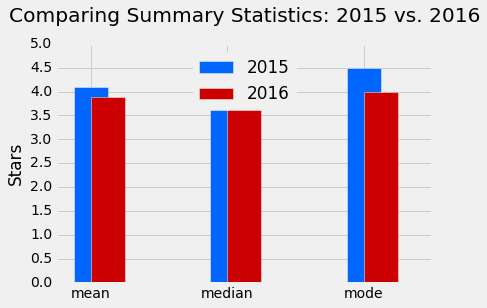

In [16]:
summary_statistics['2015'].plot.bar(label='2015', color='#0066FF', align='center', width=.25)
summary_statistics['2016/17'].plot.bar(label='2016', color='#CC0000', align='edge', rot=0, width=.25)
plt.title('Comparing Summary Statistics: 2015 vs. 2016', y=1.07)
plt.legend(loc='upper center')
plt.ylabel('Stars')
plt.yticks(np.arange(0, 5.1, 0.5))
plt.show()

## Conclusion

Recall, our original goal was to see if Fandango made good on their promise to fix the bug in their system that over inflated the rating of movies. However, due to sampling discrepancies, we had to alter the goal of the project. We now want to show that there is a marked difference in the ratings for moives in 2015 vs. 2016 from Fandango

I believe we have presented enough evidence to claim that this is, in fact, TRUE. here was a substantial change in the way Fandango reviewed movies in 2016 vs. 2015. Our kernel density estimation plots show that there was a decrease in the level of movie ratings on the website. Similarly, we showed that the mean and mode also decreased year-over-year from 2015 to 2016/17. 